In [1]:
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from generateLayout import *

In [3]:
num_columns = 4
grid_size = 30
min_room_size = 3
roomspace = grid_size - (num_columns + 1)
num_rooms = 9

In [4]:
divisions = get_divisions(roomspace, num_columns,min_room_size)
walkable_points, chosen_rooms = get_choosen_rooms(divisions,min_room_size,num_rooms)

distances = {}
for i,r1 in enumerate(chosen_rooms):
    for j,r2 in enumerate(chosen_rooms):
        if i<j:
            distances[(i,j)]=get_distance(r1,r2)
            
sorted_pairs=list(sorted(map(lambda x:(x[0],x[1]),distances.items()),key=lambda x:x[1]))
G = get_grid_graph(grid_size,walkable_points,chosen_rooms)
paths = get_paths(G,sorted_pairs,chosen_rooms,grid_size)
paths_lst = [(k, v) for k, v in paths.items()]
rooms_points  = get_room_points(chosen_rooms)
room_G = get_rooms_graph(chosen_rooms,paths_lst,rooms_points)



In [12]:
def get_crossing_edges(skels, groups_to_connect, vertices_edges_dict_inv, vertices_edges_dict):
    i, j = groups_to_connect

    setA = get_vertices_from_skels(vertices_edges_dict_inv, skels[i])
    setB = get_vertices_from_skels(vertices_edges_dict_inv, skels[j])

    setA_vertices = set([vertex for edge in setA.values() for vertex in edge])
    setB_vertices = set([vertex for edge in setB.values() for vertex in edge])

    crossing_edges = list(itertools.product(setA_vertices, setB_vertices))
    crossing_edges += (list(itertools.product(setB_vertices, setA_vertices)))
    crossing_edges = [edge for edge in crossing_edges if edge in vertices_edges_dict.keys()]
    return crossing_edges


def get_crossing_edges_list(skels, room_G, groups_to_connect, paths_lst):
    vertices_edges_dict = nx.get_edge_attributes(room_G, 'corridor_key')
    vertices_edges_dict_inv = {v: k for k, v in vertices_edges_dict.items()}
    crossing_edges = []
    for grs in groups_to_connect:
        possible_cr_edges = get_crossing_edges(skels, grs, vertices_edges_dict_inv, vertices_edges_dict)
        print(possible_cr_edges)
        print('a')
        crossing_edge = get_edges_from_skels(possible_cr_edges, grs, skels, vertices_edges_dict_inv, room_G, paths_lst,
                                             vertices_edges_dict, crossing_edges)
        crossing_edges.append(crossing_edge)
    print(crossing_edges)
    return crossing_edges

In [13]:
available_indices = set(range(num_rooms))

groups_to_connect = [(0,1),(1,2)]
splits_it = iterate_G(available_indices,[3,3,3],0,room_G)

found = False
for i,split in enumerate(splits_it):
    skels_it = get_possible_split(split)
    for skels in skels_it:
        if len(skels)==3:
            crossing_edges = get_crossing_edges_list(skels,room_G,groups_to_connect,paths_lst)
            found = True
            print(i,'::::',skels)
            break
    #if i>100:
    if found==True:
        break

string = get_layout_str(walkable_points,skels,crossing_edges,paths_lst,grid_size)
print(string)

[(0, 3), (0, 5), (0, 6), (1, 3), (1, 5), (1, 6), (2, 3), (2, 5), (2, 6)]
a
[(3, 8), (3, 4), (3, 7), (5, 8), (5, 7), (6, 8), (6, 7), (4, 5), (4, 6)]
a
[8, 17]
0 :::: [{'edges': {9, 3}, 'intersections': {18, 26}}, {'edges': {4, 5}, 'intersections': {23, 15}}, {'edges': {6, 7}, 'intersections': {21}}]
wwwwwwwwwwwwwwwwwwwwwwwwwwwwww
w      w      w     wwwwwwwwww
w      w      w     wwwwwwwwww
w      w            wwwwwwwwww
w      w      wwwwwwwwwwwwwwww
w             w     wwwwwwwwww
w      wwwww ww     wwwwwwwwww
wwwwwwwwwwww                 w
wwwwwwwwwwwwwww     w        w
wwwwwwwwwwwwwww     w        w
wwwwwwwwwwwwwww     w        w
wwwwwwwwwwwwwww     wwwwwww ww
wwwwwwwwwwwwwww www w        w
wwwwwwwwwwwwwww www w        w
wwwwwwww      w www w        w
wwwwwwww      w www          w
wwwwwwww      w wwwww        w
wwwwwwww      w wwwwwwwwww www
wwwwwwww        wwwww        w
wwwwwwww      wwwwwww        w
wwwwwwww      wwwwwww        w
wwwwwwwwwwww wwwwwwww        w
wwwwwwww      wwww

In [7]:
print(skels)

[{'edges': {9, 3}, 'intersections': {18, 26}}, {'edges': {4, 5}, 'intersections': {23, 15}}, {'edges': {6, 7}, 'intersections': {21}}]


In [235]:
def checkLayout(skels, crossing_edges, paths_lst, room_points):
    # vytáhnout všechny edges ze skels (pro každou group bude jedno pole edges)
    # edges = [[edge_z_groupy]]
    # loop přes edges a v každé iteraci budu mít všechny edge v dané groupě
        # vytvořit pole všech bodů mimo tuto groupu (všechny roomky a koridory v ostatních groupách)
        # inner přes každý edge:
        # check jestli edge se protíná s čímkoliv co je mimo tuto groupu
    # loop přes všechny crossing_edges
        # zjistit, jestli se neprotínají navzájem (intersection)
    pass

SyntaxError: unexpected EOF while parsing (4096920869.py, line 5)

In [172]:
sorted_pairs=list(sorted(map(lambda x:(x[0],x[1]),distances.items()),key=lambda x:x[1]))

In [173]:
G = get_grid_graph(grid_size,walkable_points,chosen_rooms)

In [174]:
paths = get_paths(G,sorted_pairs,chosen_rooms,grid_size)


In [175]:
paths_lst = [(k, v) for k, v in paths.items()]
rooms_points  = get_room_points(chosen_rooms)

room_G = get_rooms_graph(chosen_rooms,paths_lst,rooms_points)


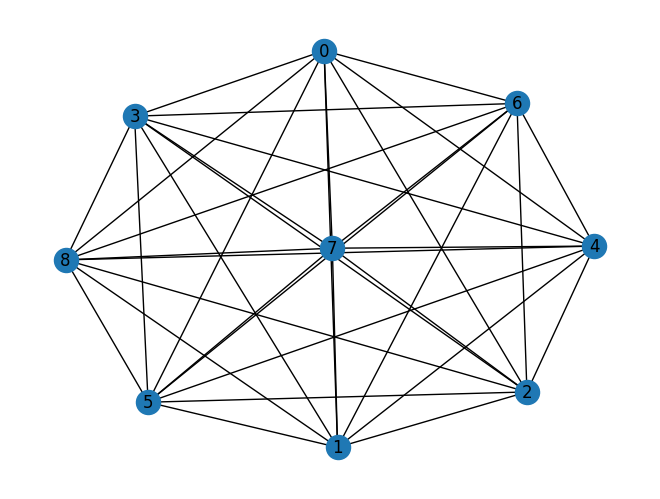

In [213]:
nx.draw(room_G, with_labels=True)
edgs=room_G.edges(data=True)

In [214]:
for e in edgs:
    print(e)

(0, 5, {'corridor_key': 0, 'crossed_corridors': [20], 'crossed_rooms': []})
(0, 7, {'corridor_key': 1, 'crossed_corridors': [], 'crossed_rooms': []})
(0, 3, {'corridor_key': 7, 'crossed_corridors': [25], 'crossed_rooms': []})
(0, 6, {'corridor_key': 12, 'crossed_corridors': [16, 20, 23, 28], 'crossed_rooms': []})
(0, 2, {'corridor_key': 13, 'crossed_corridors': [9], 'crossed_rooms': []})
(0, 8, {'corridor_key': 23, 'crossed_corridors': [10, 12, 16, 17, 19, 20, 28, 29, 30, 31, 32, 35], 'crossed_rooms': [6]})
(0, 4, {'corridor_key': 25, 'crossed_corridors': [4, 5, 7, 8, 21, 22, 27, 30, 31, 35], 'crossed_rooms': [3]})
(0, 1, {'corridor_key': 28, 'crossed_corridors': [10, 11, 12, 16, 17, 18, 20, 23, 29, 30, 32, 34], 'crossed_rooms': [6]})
(1, 8, {'corridor_key': 2, 'crossed_corridors': [26], 'crossed_rooms': []})
(1, 6, {'corridor_key': 11, 'crossed_corridors': [28, 34], 'crossed_rooms': []})
(1, 3, {'corridor_key': 19, 'crossed_corridors': [10, 23, 29, 31, 32, 35], 'crossed_rooms': []})
(

In [179]:



groups_to_connect = [(0,1),(1,2)]
available_indices = set(range(num_rooms))
splits_it = iterate_G(available_indices,[3,3,3],0,room_G)
found = False
for i,split in enumerate(splits_it):
    skels_it = get_possible_split(split)
    for skels in skels_it:
        if len(skels)==3:
            crossing_edges = get_crossing_edges_list(skels,room_G,groups_to_connect, paths_lst)
            found = True
            print(i,'::::',skels)
            break
    #if i>100:
    if found==True:
        break

[]
[27]
[27, 18]
0 :::: [{'edges': {0, 3}, 'intersections': {16, 34}}, {'edges': {12, 23}, 'intersections': {32, 33, 34, 13, 14, 15, 17, 19, 28, 30, 31}}, {'edges': {8, 9}, 'intersections': {25, 21}}]


In [180]:
%load_ext autoreload
%autoreload 2
from generateLayout import *
string = get_layout_str(walkable_points,skels,[],paths_lst,grid_size)
print(string)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
##############################
###############     ##########
###############     ##########
###############     ##########
###############     ##########
###############     ##########
###############     ##########
###############     ##########
###############     #        #
#########     #     #        #
#########     #     #        #
#########     #### ##        #
#########     #     #        #
#########     #     #        #
#########     #              #
#########     #######        #
#########           #        #
#       ########### #        #
#       #     ##### #        #
#       #     ##### #        #
#       #     ##### ##########
#       #     #####          #
#       #     #######        #
#             #####          #
#       #     ##### ##########
##### ###     ##### ##########
#       #     #     ##########
#       #     #     ##########
#       #     #     ##########
#############

In [181]:
ix = 2
def get_layout_str(walkable_points,skels,crossing_edges):
    edges = []
    for s in skels:
        edges += list(s['edges'])
    edges += crossing_edges
    walkable_points_all = list(walkable_points)
    for ix in edges:
        walkable_points_all += list(map(toL,paths_lst[ix][1]))
    walkable_points_all = set(walkable_points_all)
    string = create_string(walkable_points1,grid_size)
    return string

In [ ]:
get_points_from_group(2, skels, vertices_edges_dict_inv,room_G,paths_lst)

In [ ]:

get_points_from_room(1,room_G)

In [ ]:
# skels is a list of skeletons for each group such as the one in the cell above
# [{'edges': {0, 12}, 'intersections': {15, 21, 24, 25, 28, 29}},
# {'edges': {5, 34}, 'intersections': {31, 35}},
# {'edges': {9, 10}, 'intersections': {14}}]
# groups is a tuple of indices (i,j) of the groups which should be connected..it uses the skels list indices
# [0,1]
# setA = get all vertices from group i (use get_vertices_from_edge_ids)
# setB = get all vertices from group j (use get_vertices_from_edge_ids)
# create all possible pairs (crossing edges) where the first element is from setA and the second from setB
# iterate over the crossing edges (refered here as e): (itertools)
# now when we speak about corridors we mean corridors which are present in the skeletons in the skel list
# these corridors are stored in the 'edges' key of a given skeleton
# if the crossing_edge e intersects some room or corridor from some other group than i or j then skip this edge (other groups are present in skels list)
# intA = get intersection between the crossing edge e and anything (either room or chosen corridor) in group i
# intB = same thing but for group j
# if both intA and intB are not empty then skip this crossing edge
# else return this edge

In [ ]:

print(crossing_edges)

In [ ]:

crossing_edges = get_crossing_edges(skels, groups_to_connect,vertices_edges_dict_inv,vertices_edges_dict)
get_edges_from_skels(crossing_edges, groups_to_connect, skels,vertices_edges_dict_inv,room_G,paths_lst,vertices_edges_dict)

In [ ]:
paths_lst[4]